In [3]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
'''!pip install jovian --upgrade -q
import jovian
jovian.set_project('analysis-of-accidents-in-the-us-2016-2020')
jovian.set_colab_id('1p6omjhh6KQBC8HDk2oAGZatuhUWRZtB9')'''

"!pip install jovian --upgrade -q\nimport jovian\njovian.set_project('analysis-of-accidents-in-the-us-2016-2020')\njovian.set_colab_id('1p6omjhh6KQBC8HDk2oAGZatuhUWRZtB9')"

# analysis-of-accidents-in-the-us-2016-2020



## US Accident Analysis

In [4]:
#!pip install jovian --upgrade --quiet

In [5]:
#import jovian

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Execute this to save new versions of the notebook
#jovian.commit(project="analysis-of-accidents-in-the-us-2016-2020")

### I used the open-dataset library to download the required data from kaggle

In [8]:
!pip install opendatasets --upgrade --quiet

You should consider upgrading via the 'C:\Users\Liz Egbuchulam\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
import opendatasets as od

data_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Your Kaggle Key:Downloading us-accidents.zip to .\us-accidents


100%|██████████| 117M/117M [05:27<00:00, 376kB/s]  


In [10]:
original_file = './us-accidents/US_Accidents_Dec20_updated.csv'

## Steps to take for this project
- create a df from the original file
- explore the df using pandas
- fix missing and duplicate data
- answer questions
- get and record insights


### Questions
- Are there missing values in the data
- At what point during the year do we have the most accidents?
- At what hour during the year do we have the most accidents?
- What cities recorded the most amount of accidents?
- What time of the day are accidents most frequent in?
- 

### Exploratory Data Analysis

In [11]:
df = pd.read_csv(original_file)

In [12]:
df.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10148   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  

[5 rows x 47 columns]

In [13]:
df.shape

(1516064, 47)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [15]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06  1.516064e+06   
mean   2.238630e+00  3.690056e+01 -9.859919e+01  3.690061e+01 -9.859901e+01   
std    6.081481e-01  5.165653e+00  1.849602e+01  5.165629e+00  1.849590e+01   
min    1.000000e+00  2.457022e+01 -1.244976e+02  2.457011e+01 -1.244978e+02   
25%    2.000000e+00  3.385422e+01 -1.182076e+02  3.385420e+01 -1.182077e+02   
50%    2.000000e+00  3.735113e+01 -9.438100e+01  3.735134e+01 -9.437987e+01   
75%    2.000000e+00  4.072593e+01 -8.087469e+01  4.072593e+01 -8.087449e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  1.516064e+06  4.699690e+05    1.473031e+06   1.066748e+06   
mean   5.872617e-01  8.907533e+03    5.958460e+01   5.510976e+01   
std    1.632659e+00  2.242190e+04    1.827316e+01   2.112735e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    0.000000e+00  1.212000e+03    4.700000e+01   4.080000e+01   
50%    1.780000e-01  4.000000e+03    6.100000e+01   5.700000e+01   
75%    5.940000e-01  1.010000e+04    7.300000e+01   7.100000e+01   
max    1.551860e+02  9.999997e+06    1.706000e+02   1.130000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  1.470555e+06  1.479790e+06    1.471853e+06     1.387202e+06   
mean   6.465960e+01  2.955495e+01    9.131755e+00     7.630812e+00   
std    2.325986e+01  1.016756e+00    2.889112e+00     5.637364e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.944000e+01    1.000000e+01     4.600000e+00   
50%    6.800000e+01  2.988000e+01    1.000000e+01     7.000000e+00   
75%    8.400000e+01  3.004000e+01    1.000000e+01     1.040000e+01   
max    1.000000e+02  5.804000e+01    1.400000e+02     9.840000e+02   

       Precipitation(in)  
count       1.005515e+06  
mean        8.477855e-03  
std         1.293168e-01  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [16]:
# I want to check how many numeric columns are there in the data
numerics = ['int16', 'int32', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [17]:
# Searching for missing values
df.isna().sum().sort_values(ascending=False)

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
Sunrise_Sunset                83
Civil_Twilight                83
Nautical_Twilight             83
Astronomical_Twilight         83
City                          83
Country                        0
Give_Way                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout                     0
Railway   

In [18]:
# let's use the percentage of the missing values instead
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)

In [19]:
missing_percentages[missing_percentages != 0]

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
dtype: float64

<AxesSubplot:>

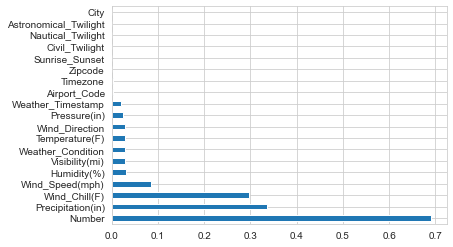

In [20]:
sns.set_style('whitegrid') # set the style to use for the plots

missing_percentages[missing_percentages != 0].plot(kind='barh')

### Analyzing the City Column

In [21]:
# no. of accidents per city
cities_by_accs = df['City'].value_counts()
cities_by_accs

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

<AxesSubplot:>

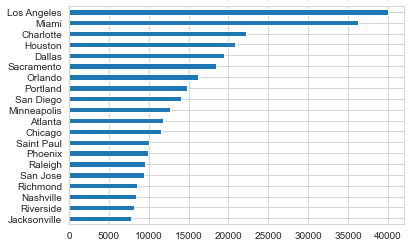

In [22]:
# plotting the cities with the top 20 accident occurrence

top_20_cities_accs = df['City'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
top_20_cities_accs

In [23]:
# let's get the cities with the most accidents and those with the least
high_acc_cities = cities_by_accs[cities_by_accs >= 1000]
low_acc_cities = cities_by_accs[cities_by_accs < 1000]

print(high_acc_cities.count())
print()
print(low_acc_cities.count())

251

10406


In [24]:
cities_by_accs.loc[cities_by_accs == 1]

South Paris                     1
Aberdeen Proving Ground         1
Rebecca                         1
Hiltons                         1
Jeanerette                      1
                               ..
Manzanita                       1
West Brooklyn                   1
Garfield Heights                1
Belding                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1167, dtype: int64

### Analyzing Start time column

In [25]:
# change the Start_time column to a timestamp

df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In which months do we have the most accidents?

C:\Users\Liz Egbuchulam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

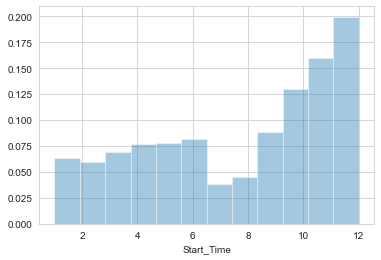

In [26]:
sns.distplot(df['Start_Time'].dt.month, bins=12, kde=False, norm_hist=True)

What day of the week do we have the most accidents?

<AxesSubplot:xlabel='Start_Time'>

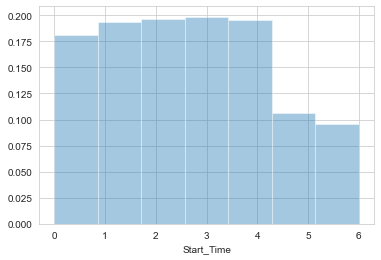

In [27]:
sns.distplot(df['Start_Time'].dt.dayofweek, bins=7, kde=False, norm_hist=True) 

# We see that weekdays are when we have the most accidents, 
# typically between Tuesdays and Fridays

What hour of the day do we have the most accidents?


<AxesSubplot:xlabel='Start_Time'>

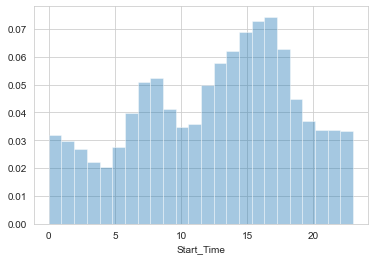

In [28]:
sns.distplot(df['Start_Time'].dt.hour, bins=24, kde=False, norm_hist=True) 

# the norm_hist parameter gives us the y-axis as percentages instead


# Between the hours of 3pm and 6pm

At what time during weekdays do we have the most accidents?

<AxesSubplot:xlabel='Start_Time'>

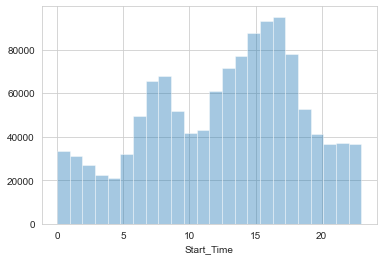

In [29]:
weekdays = df.loc[df['Start_Time'].dt.dayofweek.isin([0,1,2,3,4]) ]
sns.distplot(weekdays['Start_Time'].dt.hour, bins=24, kde=False)

# Between the hours of 3pm and 6pm

At what time during Sundays do we have the most accidents?

<AxesSubplot:xlabel='Start_Time'>

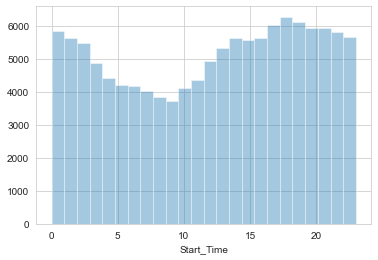

In [30]:
sundays = df.loc[df['Start_Time'].dt.dayofweek == 6 ]
sns.distplot(sundays['Start_Time'].dt.hour, bins=24, kde=False)

<AxesSubplot:xlabel='Start_Time'>

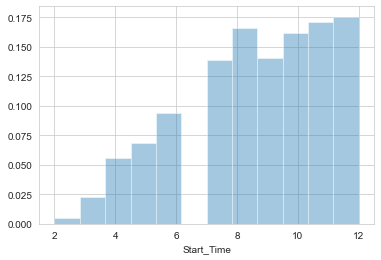

In [31]:
df_2019 = df[df['Start_Time'].dt.year == 2016]
sns.distplot(df_2019['Start_Time'].dt.month, bins = 12, kde=False, norm_hist=True)

C:\Users\LIZEGB~1\AppData\Local\Temp/ipykernel_48920/4249836117.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sns.distplot(df['Start_Time'].dt.week, bins=4, kde=False, norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

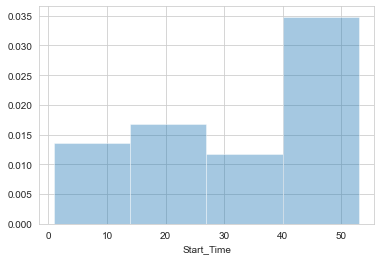

In [32]:
sns.distplot(df['Start_Time'].dt.week, bins=4, kde=False, norm_hist=True)

# accidents are more during the last few weeks of the year

### Analysing the Start Latitude and Longitude columns

#### Let's plot maps showing the locations of these accidents

**Note**: I used a sample of the dataset to plot a map. Reason being performance issues

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

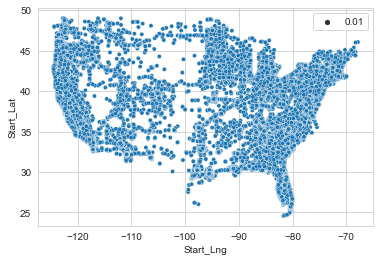

In [33]:
# scatter plot
sample_df = df.sample(int(0.1* len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.01)

In [35]:
# we'll use the folium map to create a map
!pip install folium
import folium as fm

# the first thing is to get a df containing the lats and longs and then 
# convert that to a list. This will enabled me loop through the list easily

locations = df[['Start_Lat', 'Start_Lng']].sample(int(0.001 * len(df)))
locationlist = locations.values.tolist()

# the farthest location on our dataset
lat, lng = df.Start_Lat.sample(int(0.001 * len(df))), df.Start_Lng.sample(int(0.001 * len(df)))
lat.max(), lng.max()

You should consider upgrading via the 'C:\Users\Liz Egbuchulam\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


(48.94602, -70.29896)

In [ ]:
map = fm.Map(zoom_start=12)
marker = fm.Marker((lat.max(), lng.max()))
marker.add_to(map)
map

In [ ]:
# Next, I created the map object with the farthest lat and long
my_map = fm.Map(location=(48.879786, -68.292279), zoom_start=12)

for point in range(0, len(locationlist)):
  fm.Marker(locationlist[point], popup=df['County'][point]).add_to(my_map)

my_map



The map above is good but can be made better. I will make the following changes:
- too many points are clustered and can't be seen, so I'll create clusters
- change the base tile to 'CartoDB dark matter'
- reduce the zoom level to 11

In [ ]:
from folium.plugins import MarkerCluster

my_map2 = fm.Map(location=(48.879786, -68.292279), tiles = 'CartoDB positron', 
                 zoom_start=11)

marker_cluster = MarkerCluster().add_to(my_map2)

for point in range(0, len(locationlist)):
  fm.Marker(locationlist[point], popup=df['County'][point]).add_to(marker_cluster)

my_map2

#my_map2.save('accident_dist_in_us.html')


#### Let's draw a heatmap of the data using folium

In [ ]:
from folium.plugins import HeatMap
map2 = fm.Map()

heat_data = zip(list(lat), list(lng))

HeatMap(heat_data).add_to(map2)

map2


### Summary and insights
- No data from the state of New York
- less than 5% of the cities have less than 1000 accidents
- over a thousand cities reported just 1 accident
- Between the hours of 3-6pm is when we have the most accidents. A high percentage of accidents also occur in the mornings between 7-10am
- accidents are highest during weekdays as compared to weekends
- accidents are more during between Oct and Dec
- there seems to be some inconsistencies with the data. for example, there is no data for Jan 2016 and a data for a particular month (July) is also missing
- The maps show that the accidents are more concentrated along the coasts

In [ ]:
#import jovian
#jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/originalugo/analysis-of-accidents-in-the-us-2016-2020


'https://jovian.ai/originalugo/analysis-of-accidents-in-the-us-2016-2020'